In [1]:
import pandas as pd
# Import modul reglar expression
import re
import string
import numpy as np

import nltk
# Import kelas word_tokenize
from nltk.tokenize import word_tokenize
# Import kelas FreqDist
from nltk.probability import FreqDist
# Import kelas PosterStemmer
from nltk.stem import PorterStemmer
# Import kelas stopwords
from nltk.corpus import stopwords

# Import kelas StemmerFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

In [2]:
# Membaca data Twitter yang berupa file .csv menggunakan modul pandas
dataTweet = pd.read_csv('Pemilu15_23Des.csv')
print("Data size : ", dataTweet.shape)
dataTweet.head()

Data size :  (6156, 3)


,waktu,user,teks
0,2022-12-23 03:01:06,79_biru,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...
1,2022-12-23 02:57:23,RomBedul,RT @OposisiCerdas: Jokowi Minta Pemilu 2024 Sp...
2,2022-12-23 02:45:50,akhirrzaman78,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...
3,2022-12-23 02:45:22,MonCha65938734,RT @rockyu01: @caul_tanjung Dimulai d tahapan ...
4,2022-12-23 02:45:17,MonCha65938734,RT @makrete: @caul_tanjung Hubungan nya apa g...


In [3]:
# Membaca data Twitter yang berupa file .csv menggunakan modul pandas
dataTweet = pd.read_csv('Pemilu15_23Des.csv')
print("Data size : ", dataTweet.shape)
dataTweet.head()

Data size :  (6156, 3)


,waktu,user,teks
0,2022-12-23 03:01:06,79_biru,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...
1,2022-12-23 02:57:23,RomBedul,RT @OposisiCerdas: Jokowi Minta Pemilu 2024 Sp...
2,2022-12-23 02:45:50,akhirrzaman78,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...
3,2022-12-23 02:45:22,MonCha65938734,RT @rockyu01: @caul_tanjung Dimulai d tahapan ...
4,2022-12-23 02:45:17,MonCha65938734,RT @makrete: @caul_tanjung Hubungan nya apa g...


In [4]:
#---------------------------------------- Cleaning Data ----------------------------------------#
# Cleaning data yaitu proses dimana menghilangkan noise pada data agar tidak mengganggu pada saat pemrosesan data.
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def cleaning(tweet):
    #Menghilangkan Simbol RT
    tweet = re.sub(r'RT[\s]+', '', str(tweet))
    #Menghilangkan Simbol \n
    tweet = re.sub(r'\n[\s]+', '', str(tweet))
    #Menghilangkan Simbol b
    tweet = re.sub(r'b [\s]+', '', str(tweet))
    #Menghilangkan user
    tweet = re.sub(r'(^|[^@\w])@(\w{1,15})\b', '', str(tweet))
    #Menghilangkan Tagar
    tweet = re.sub(r'#[A-Za-z0-9]+', '', str(tweet))
    #Menghilangkan link
    tweet = re.sub(r"http\S+", '', str(tweet))
    #Menghilangkan xf
    tweet = re.sub(r"xf\S+", '', str(tweet))
    #Menghilangkan xe
    tweet = re.sub(r"xe\S+", '', str(tweet))
    #Menghilangkan angka
    tweet = re.sub(r'[0-9]+', '', str(tweet))
    # Menghilangkan beberapa spasi menjadi satu spasi
    tweet = re.sub('\s+', ' ', str(tweet))
    # Menghapus karakter tunggal (single char)
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))
    # Menghilangkan tab, baris baru, dan back slice
    tweet = str(tweet).replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    # Menghilangkan non ASCII (emoticon, chinese word, .etc)
    tweet = str(tweet).encode('ascii', 'replace').decode('ascii')
    #menghilangkan punctuation
    tweet = str(tweet).translate(str.maketrans('', '', string.punctuation))
    #Menghilangkan tweet kosong
    tweet = str(tweet).strip(' ')
    
    # Menghapus emoticon
    regrex_pattern = re.compile(pattern='['
                                        u'\U0001F600-\U0001F64F'
                                        u'\U0001F300-\U0001F5FF'
                                        u'\U0001F680-\U0001F6FF'
                                        u'\U0001F1E0-\U0001F1FF'
                                        ']+', flags=re.UNICODE)

    return tweet
dataTweet['cleaning'] = dataTweet['teks'].apply(cleaning)
dataTweet.head(10)

,waktu,user,teks,cleaning
0,2022-12-23 03:01:06,79_biru,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...
1,2022-12-23 02:57:23,RomBedul,RT @OposisiCerdas: Jokowi Minta Pemilu 2024 Sp...,Jokowi Minta Pemilu Sportif Demokrat Minta Jan...
2,2022-12-23 02:45:50,akhirrzaman78,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...
3,2022-12-23 02:45:22,MonCha65938734,RT @rockyu01: @caul_tanjung Dimulai d tahapan ...,Dimulai tahapan tunda pemilu
4,2022-12-23 02:45:17,MonCha65938734,RT @makrete: @caul_tanjung Hubungan nya apa g...,Hubungan nya apa gara ketua KPU cabul pemilu d...
5,2022-12-23 02:43:29,BangferRiau,RT @RadarKorupsi: https://t.co/nheU3KDWxK \r\n...,Enak aja minta tunda
6,2022-12-23 02:42:25,MonCha65938734,RT @MuntheAruzi: @caul_tanjung Ujung2nya kok l...,Ujungnya kok lari ke pemilu di tundaganti aja ...
7,2022-12-23 02:38:05,georgiussoetjip,RT @YanHarahap: Isu Tunda Pemilu Dibahas di Pe...,Isu Tunda Pemilu Dibahas di Pertemuan Jam dan...
8,2022-12-23 02:35:06,RadarKorupsi,https://t.co/nheU3KDWxK \r\n\r\nEnak aja minta...,Enak aja minta tunda
9,2022-12-23 02:27:10,Camelaila1,RT @Muslim_AntiPKI9: SKENARIO BABGSAT\r\n\r\nS...,SKENARIO BABGSAT SEDARI AWAL DIPILIH BAJINGAN ...


In [5]:
#dataTweet.to_csv('HasilCleaning.csv',encoding='utf8', index=False)

In [6]:
def casefoldingText(tweet):
    tweet = str(tweet).lower()
    return tweet
dataTweet['case_folding'] = dataTweet['cleaning'].apply(casefoldingText)
dataTweet.head()

,waktu,user,teks,cleaning,case_folding
0,2022-12-23 03:01:06,79_biru,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...
1,2022-12-23 02:57:23,RomBedul,RT @OposisiCerdas: Jokowi Minta Pemilu 2024 Sp...,Jokowi Minta Pemilu Sportif Demokrat Minta Jan...,jokowi minta pemilu sportif demokrat minta jan...
2,2022-12-23 02:45:50,akhirrzaman78,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...
3,2022-12-23 02:45:22,MonCha65938734,RT @rockyu01: @caul_tanjung Dimulai d tahapan ...,Dimulai tahapan tunda pemilu,dimulai tahapan tunda pemilu
4,2022-12-23 02:45:17,MonCha65938734,RT @makrete: @caul_tanjung Hubungan nya apa g...,Hubungan nya apa gara ketua KPU cabul pemilu d...,hubungan nya apa gara ketua kpu cabul pemilu d...


In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
#---------------------------------------- Tokenizing ----------------------------------------#
# Tokenizing proses pemisahan teks menjadi potongan-potongan kata yang disebut token untuk kemudian dianalisa.
def tokenizing(tweet):
    tweet = nltk.tokenize.word_tokenize(tweet)
    return tweet

# Menghitung frekuensi distribusi token pada tiap row data pada Dataframe
def freqdist(tweet):
    return FreqDist(tweet)

In [9]:
dataTweet['tokenizing'] = dataTweet['case_folding'].apply(tokenizing)
dataTweet.head()

,waktu,user,teks,cleaning,case_folding,tokenizing
0,2022-12-23 03:01:06,79_biru,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...,"[bisa, memicu, konflik, sara, atau, sengaja, t..."
1,2022-12-23 02:57:23,RomBedul,RT @OposisiCerdas: Jokowi Minta Pemilu 2024 Sp...,Jokowi Minta Pemilu Sportif Demokrat Minta Jan...,jokowi minta pemilu sportif demokrat minta jan...,"[jokowi, minta, pemilu, sportif, demokrat, min..."
2,2022-12-23 02:45:50,akhirrzaman78,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...,"[bisa, memicu, konflik, sara, atau, sengaja, t..."
3,2022-12-23 02:45:22,MonCha65938734,RT @rockyu01: @caul_tanjung Dimulai d tahapan ...,Dimulai tahapan tunda pemilu,dimulai tahapan tunda pemilu,"[dimulai, tahapan, tunda, pemilu]"
4,2022-12-23 02:45:17,MonCha65938734,RT @makrete: @caul_tanjung Hubungan nya apa g...,Hubungan nya apa gara ketua KPU cabul pemilu d...,hubungan nya apa gara ketua kpu cabul pemilu d...,"[hubungan, nya, apa, gara, ketua, kpu, cabul, ..."


In [10]:
#dataTweet.to_csv('HasilTokenizer.csv',encoding='utf8', index=False)

In [11]:
#---------------------------------------- Normalisasi ----------------------------------------#
# Membaca data normalisasi yang berupa file .xlsx menggunakan modul pandas
normalizad_word = pd.read_excel("Slang.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normlized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [12]:
dataTweet['normalisasi'] = dataTweet['tokenizing'].apply(normlized_term)
dataTweet.head()

,waktu,user,teks,cleaning,case_folding,tokenizing,normalisasi
0,2022-12-23 03:01:06,79_biru,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...,"[bisa, memicu, konflik, sara, atau, sengaja, t...","[bisa, memicu, konflik, sara, atau, sengaja, u..."
1,2022-12-23 02:57:23,RomBedul,RT @OposisiCerdas: Jokowi Minta Pemilu 2024 Sp...,Jokowi Minta Pemilu Sportif Demokrat Minta Jan...,jokowi minta pemilu sportif demokrat minta jan...,"[jokowi, minta, pemilu, sportif, demokrat, min...","[jokowi, minta, pemilu, sportif, demokrat, min..."
2,2022-12-23 02:45:50,akhirrzaman78,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...,"[bisa, memicu, konflik, sara, atau, sengaja, t...","[bisa, memicu, konflik, sara, atau, sengaja, u..."
3,2022-12-23 02:45:22,MonCha65938734,RT @rockyu01: @caul_tanjung Dimulai d tahapan ...,Dimulai tahapan tunda pemilu,dimulai tahapan tunda pemilu,"[dimulai, tahapan, tunda, pemilu]","[dimulai, tahapan, tunda, pemilu]"
4,2022-12-23 02:45:17,MonCha65938734,RT @makrete: @caul_tanjung Hubungan nya apa g...,Hubungan nya apa gara ketua KPU cabul pemilu d...,hubungan nya apa gara ketua kpu cabul pemilu d...,"[hubungan, nya, apa, gara, ketua, kpu, cabul, ...","[hubungan, nya, apa, gara, ketua, kpu, cabul, ..."


In [13]:
#dataTweet.to_csv('HasilNormalisasi.csv',encoding='utf8', index=False)

In [14]:
#---------------------------------------- Filtering (Stopword Removel) ----------------------------------------#
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = [
    'yg', 'utk', 'cuman', 'deh', 'btw', 'tapi', 'gua', 'gue', 'lo', 'lu', 'hh', 'xfxfxxb', 'axexxa', 'nxexxa', 
    'xfxfxx', 'xfxfxxaxfxfxxaxfxfxxaxfxfxxbxfxfxxaxfxfxxan', 'xexxaxexxa', 'xfxfxaxann', 'atauxexxa', 'hinxexxa', 
    'kxexxa', 'xfxfxxb', 'hmmm', 
    'ohh', 'ooh', 'kalo', 'trs', 'jd', 'nih', 'ntar', 'nya', 'lg', 'gk', 'ecusli', 'dpt', 'kmr', 'haloo', 
    'dr', 'kpn', 'kok', 'kyk', 'donk', 'yah', 'u', 'ya', 'ga', 'km', 'eh', 'gooooo', 'ooo', 
    'sih', 'bro', 'bang', 'br', 'kek', 'rp', 'jt', 'kan', 'gpp', 'sm', 'usah', 'pun', 'punn', 
    'mas', 'sob', 'thx', 'ato', 'jg', 'gw', 'wkwk', 'mak', 'haha', 'iy', 'k', 'ynggg', 'heem', 
    'tp', 'haha', 'dg', 'dri', 'duh', 'ye', 'wkwkwk', 'syg', 'btw', 'gaes', 'wih', 'ono', 'noh', 
    'guys', 'moga', 'kmrn', 'nemu', 'yukkk', 'wkwkw', 'klas', 'ew', 'lho', 'sbnry', 'ops', 'ah', 
    'org', 'gtu', 'bwt', 'klrga', 'clau', 'lbh', 'cpet', 'ku', 'wke', 'mba', 'sdh', 'koq', 'kak', 
    'oi', 'spt', 'dlm', 'bs', 'krn', 'jgn', 'sapa', 'sh', 'wakakaka', 'sihhh', 'hehe', 'mr', 
    'ih', 'dgn', 'la', 'kl', 'ttg', 'mana', 'kmna', 'kmn', 'tdk', 'tuh', 'dah', 'kek', 'loh', 
    'ko', 'pls', 'bbrp', 'pd', 'mah', 'dhhh', 'kpd', 'tsb', 'kzl', 'byar', 'si', 'sii', 'hah', 'yaaa', 
    'cm', 'sy', 'hahahaha', 'weh', 'dlu', 'tuhh', 'dng', 'lohh', 'lha', 'cuy', 'broo', 'klo', 'xfxfxxd'
]
data = stop_factory + more_stopwords

dictionary = ArrayDictionary(data)
str = StopWordRemover(dictionary)

# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

#print(data)
def filtering(tweet):
    #tokenize tweets
    #tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    #tweet_tokens = tokenizer.tokenize(tweet)
    
    removed = []
    for word in tweet:
        if (word not in data and
           word not in emoticons):
            removed.append(word)
    return removed

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
dataTweet['filtering'] = dataTweet['normalisasi'].apply(filtering)
dataTweet.head()

,waktu,user,teks,cleaning,case_folding,tokenizing,normalisasi,filtering
0,2022-12-23 03:01:06,79_biru,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...,"[bisa, memicu, konflik, sara, atau, sengaja, t...","[bisa, memicu, konflik, sara, atau, sengaja, u...","[memicu, konflik, sara, sengaja, meloloskan, c..."
1,2022-12-23 02:57:23,RomBedul,RT @OposisiCerdas: Jokowi Minta Pemilu 2024 Sp...,Jokowi Minta Pemilu Sportif Demokrat Minta Jan...,jokowi minta pemilu sportif demokrat minta jan...,"[jokowi, minta, pemilu, sportif, demokrat, min...","[jokowi, minta, pemilu, sportif, demokrat, min...","[jokowi, pemilu, sportif, demokrat, upaya, tun..."
2,2022-12-23 02:45:50,akhirrzaman78,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...,"[bisa, memicu, konflik, sara, atau, sengaja, t...","[bisa, memicu, konflik, sara, atau, sengaja, u...","[memicu, konflik, sara, sengaja, meloloskan, c..."
3,2022-12-23 02:45:22,MonCha65938734,RT @rockyu01: @caul_tanjung Dimulai d tahapan ...,Dimulai tahapan tunda pemilu,dimulai tahapan tunda pemilu,"[dimulai, tahapan, tunda, pemilu]","[dimulai, tahapan, tunda, pemilu]","[tahapan, tunda, pemilu]"
4,2022-12-23 02:45:17,MonCha65938734,RT @makrete: @caul_tanjung Hubungan nya apa g...,Hubungan nya apa gara ketua KPU cabul pemilu d...,hubungan nya apa gara ketua kpu cabul pemilu d...,"[hubungan, nya, apa, gara, ketua, kpu, cabul, ...","[hubungan, nya, apa, gara, ketua, kpu, cabul, ...","[hubungan, gara, ketua, kpu, cabul, pemilu, tu..."


In [16]:
#dataTweet.to_csv('HasilStopword.csv',encoding='utf8', index=False)

In [17]:
#---------------------------------------- Steaming ----------------------------------------#
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tweet):
    tweet_stem = []
    for word in tweet:
        stem_word = stemmer.stem(word) # stemming word
        tweet_stem.append(stem_word)
    return tweet_stem

In [18]:
dataTweet['stemming'] = dataTweet['filtering'].apply(stemming)
dataTweet.head()

,waktu,user,teks,cleaning,case_folding,tokenizing,normalisasi,filtering,stemming
0,2022-12-23 03:01:06,79_biru,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...,"[bisa, memicu, konflik, sara, atau, sengaja, t...","[bisa, memicu, konflik, sara, atau, sengaja, u...","[memicu, konflik, sara, sengaja, meloloskan, c...","[picu, konflik, sara, sengaja, lolos, cipta, k..."
1,2022-12-23 02:57:23,RomBedul,RT @OposisiCerdas: Jokowi Minta Pemilu 2024 Sp...,Jokowi Minta Pemilu Sportif Demokrat Minta Jan...,jokowi minta pemilu sportif demokrat minta jan...,"[jokowi, minta, pemilu, sportif, demokrat, min...","[jokowi, minta, pemilu, sportif, demokrat, min...","[jokowi, pemilu, sportif, demokrat, upaya, tun...","[jokowi, milu, sportif, demokrat, upaya, tunda..."
2,2022-12-23 02:45:50,akhirrzaman78,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...,"[bisa, memicu, konflik, sara, atau, sengaja, t...","[bisa, memicu, konflik, sara, atau, sengaja, u...","[memicu, konflik, sara, sengaja, meloloskan, c...","[picu, konflik, sara, sengaja, lolos, cipta, k..."
3,2022-12-23 02:45:22,MonCha65938734,RT @rockyu01: @caul_tanjung Dimulai d tahapan ...,Dimulai tahapan tunda pemilu,dimulai tahapan tunda pemilu,"[dimulai, tahapan, tunda, pemilu]","[dimulai, tahapan, tunda, pemilu]","[tahapan, tunda, pemilu]","[tahap, tunda, milu]"
4,2022-12-23 02:45:17,MonCha65938734,RT @makrete: @caul_tanjung Hubungan nya apa g...,Hubungan nya apa gara ketua KPU cabul pemilu d...,hubungan nya apa gara ketua kpu cabul pemilu d...,"[hubungan, nya, apa, gara, ketua, kpu, cabul, ...","[hubungan, nya, apa, gara, ketua, kpu, cabul, ...","[hubungan, gara, ketua, kpu, cabul, pemilu, tu...","[hubung, gara, ketua, kpu, cabul, milu, tunda]"


In [19]:
#dataTweet.to_csv('HasilStemming.csv',encoding='utf8', index=False)

In [20]:
# remove punct
def remove_punct(tweet):
    tweet = " ".join([char for char in tweet if char not in string.punctuation])
    return tweet
dataTweet['tweets'] = dataTweet['stemming'].apply(remove_punct)
dataTweet.head()

,waktu,user,teks,cleaning,case_folding,tokenizing,normalisasi,filtering,stemming,tweets
0,2022-12-23 03:01:06,79_biru,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...,"[bisa, memicu, konflik, sara, atau, sengaja, t...","[bisa, memicu, konflik, sara, atau, sengaja, u...","[memicu, konflik, sara, sengaja, meloloskan, c...","[picu, konflik, sara, sengaja, lolos, cipta, k...",picu konflik sara sengaja lolos cipta kondisi ...
1,2022-12-23 02:57:23,RomBedul,RT @OposisiCerdas: Jokowi Minta Pemilu 2024 Sp...,Jokowi Minta Pemilu Sportif Demokrat Minta Jan...,jokowi minta pemilu sportif demokrat minta jan...,"[jokowi, minta, pemilu, sportif, demokrat, min...","[jokowi, minta, pemilu, sportif, demokrat, min...","[jokowi, pemilu, sportif, demokrat, upaya, tun...","[jokowi, milu, sportif, demokrat, upaya, tunda...",jokowi milu sportif demokrat upaya tunda milu
2,2022-12-23 02:45:50,akhirrzaman78,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...,"[bisa, memicu, konflik, sara, atau, sengaja, t...","[bisa, memicu, konflik, sara, atau, sengaja, u...","[memicu, konflik, sara, sengaja, meloloskan, c...","[picu, konflik, sara, sengaja, lolos, cipta, k...",picu konflik sara sengaja lolos cipta kondisi ...
3,2022-12-23 02:45:22,MonCha65938734,RT @rockyu01: @caul_tanjung Dimulai d tahapan ...,Dimulai tahapan tunda pemilu,dimulai tahapan tunda pemilu,"[dimulai, tahapan, tunda, pemilu]","[dimulai, tahapan, tunda, pemilu]","[tahapan, tunda, pemilu]","[tahap, tunda, milu]",tahap tunda milu
4,2022-12-23 02:45:17,MonCha65938734,RT @makrete: @caul_tanjung Hubungan nya apa g...,Hubungan nya apa gara ketua KPU cabul pemilu d...,hubungan nya apa gara ketua kpu cabul pemilu d...,"[hubungan, nya, apa, gara, ketua, kpu, cabul, ...","[hubungan, nya, apa, gara, ketua, kpu, cabul, ...","[hubungan, gara, ketua, kpu, cabul, pemilu, tu...","[hubung, gara, ketua, kpu, cabul, milu, tunda]",hubung gara ketua kpu cabul milu tunda


In [21]:
print("Data size sebelum: ", dataTweet.shape)
# remove tweet duplikat
dataTweet.drop_duplicates(subset = 'tweets', inplace = True)
# remove tweet kosong
dataTweet = dataTweet[dataTweet['tweets']!='']
print("Data size sesudah: ", dataTweet.shape)
dataTweet.head()

dataTweet = dataTweet.reset_index(drop=True)
dataTweet.head()

Data size sebelum:  (6156, 10)
Data size sesudah:  (651, 10)


,waktu,user,teks,cleaning,case_folding,tokenizing,normalisasi,filtering,stemming,tweets
0,2022-12-23 03:01:06,79_biru,RT @sehat_roemah: BISA MEMICU KONFLIK SARA ata...,BISA MEMICU KONFLIK SARA atau sengaja tuk melo...,bisa memicu konflik sara atau sengaja tuk melo...,"[bisa, memicu, konflik, sara, atau, sengaja, t...","[bisa, memicu, konflik, sara, atau, sengaja, u...","[memicu, konflik, sara, sengaja, meloloskan, c...","[picu, konflik, sara, sengaja, lolos, cipta, k...",picu konflik sara sengaja lolos cipta kondisi ...
1,2022-12-23 02:57:23,RomBedul,RT @OposisiCerdas: Jokowi Minta Pemilu 2024 Sp...,Jokowi Minta Pemilu Sportif Demokrat Minta Jan...,jokowi minta pemilu sportif demokrat minta jan...,"[jokowi, minta, pemilu, sportif, demokrat, min...","[jokowi, minta, pemilu, sportif, demokrat, min...","[jokowi, pemilu, sportif, demokrat, upaya, tun...","[jokowi, milu, sportif, demokrat, upaya, tunda...",jokowi milu sportif demokrat upaya tunda milu
2,2022-12-23 02:45:22,MonCha65938734,RT @rockyu01: @caul_tanjung Dimulai d tahapan ...,Dimulai tahapan tunda pemilu,dimulai tahapan tunda pemilu,"[dimulai, tahapan, tunda, pemilu]","[dimulai, tahapan, tunda, pemilu]","[tahapan, tunda, pemilu]","[tahap, tunda, milu]",tahap tunda milu
3,2022-12-23 02:45:17,MonCha65938734,RT @makrete: @caul_tanjung Hubungan nya apa g...,Hubungan nya apa gara ketua KPU cabul pemilu d...,hubungan nya apa gara ketua kpu cabul pemilu d...,"[hubungan, nya, apa, gara, ketua, kpu, cabul, ...","[hubungan, nya, apa, gara, ketua, kpu, cabul, ...","[hubungan, gara, ketua, kpu, cabul, pemilu, tu...","[hubung, gara, ketua, kpu, cabul, milu, tunda]",hubung gara ketua kpu cabul milu tunda
4,2022-12-23 02:43:29,BangferRiau,RT @RadarKorupsi: https://t.co/nheU3KDWxK \r\n...,Enak aja minta tunda,enak aja minta tunda,"[enak, aja, minta, tunda]","[enak, saja, minta, tunda]",[tunda],[tunda],tunda


In [22]:
# remove kolom
dataTweet.drop(dataTweet.columns[[1,2,3,4,5,6,7]], axis = 1, inplace = True)
dataTweet.head()

,waktu,stemming,tweets
0,2022-12-23 03:01:06,"[picu, konflik, sara, sengaja, lolos, cipta, k...",picu konflik sara sengaja lolos cipta kondisi ...
1,2022-12-23 02:57:23,"[jokowi, milu, sportif, demokrat, upaya, tunda...",jokowi milu sportif demokrat upaya tunda milu
2,2022-12-23 02:45:22,"[tahap, tunda, milu]",tahap tunda milu
3,2022-12-23 02:45:17,"[hubung, gara, ketua, kpu, cabul, milu, tunda]",hubung gara ketua kpu cabul milu tunda
4,2022-12-23 02:43:29,[tunda],tunda


In [23]:
# simpan data bersih
#dataTweet.to_csv('stemtweets.csv',encoding='utf8', index=False)

In [24]:
dataTweet.head()

,waktu,stemming,tweets
0,2022-12-23 03:01:06,"[picu, konflik, sara, sengaja, lolos, cipta, k...",picu konflik sara sengaja lolos cipta kondisi ...
1,2022-12-23 02:57:23,"[jokowi, milu, sportif, demokrat, upaya, tunda...",jokowi milu sportif demokrat upaya tunda milu
2,2022-12-23 02:45:22,"[tahap, tunda, milu]",tahap tunda milu
3,2022-12-23 02:45:17,"[hubung, gara, ketua, kpu, cabul, milu, tunda]",hubung gara ketua kpu cabul milu tunda
4,2022-12-23 02:43:29,[tunda],tunda


In [25]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('Lexicon/lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('Lexicon/lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score >= 0):
        polarity = 'positif'
    else:
        polarity = 'negatif'
    return score, polarity

In [26]:
#Results from determine sentiment polarity of tweets

results = dataTweet['stemming'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
dataTweet['polarity_score'] = results[0]
dataTweet['polarity'] = results[1]
print(dataTweet['polarity'].value_counts())

negatif    355
positif    296
Name: polarity, dtype: int64


<AxesSubplot:>

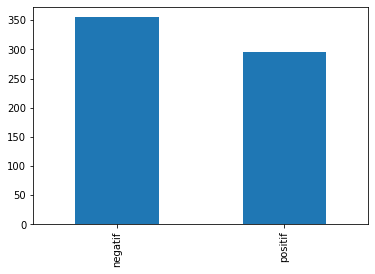

In [27]:
dataTweet['polarity'].value_counts().plot(kind='bar')

In [28]:
dataTweet[['stemming','polarity_score','polarity']]

,stemming,polarity_score,polarity
0,"[picu, konflik, sara, sengaja, lolos, cipta, k...",-12,negatif
1,"[jokowi, milu, sportif, demokrat, upaya, tunda...",0,positif
2,"[tahap, tunda, milu]",0,positif
3,"[hubung, gara, ketua, kpu, cabul, milu, tunda]",-11,negatif
4,[tunda],0,positif
...,...,...,...
646,"[negara, nenek, moyang, kudeta, konstitusi, un...",-2,negatif
647,"[cebong, ngotot, tunda, milu, periode, iya, iy...",-7,negatif
648,"[harus, milu, tundatetapi, tiadakansoal, dpn, ...",-5,negatif
649,"[memble, ikn, tunda, milu, periode]",-3,negatif


In [29]:
def polarity_encode(x):
    if(x == 'positif'):
        return '1'
    if(x == 'negatif'):
        return '0'
dataTweet.polarity = dataTweet.polarity.apply(polarity_encode)
dataTweet.head()

,waktu,stemming,tweets,polarity_score,polarity
0,2022-12-23 03:01:06,"[picu, konflik, sara, sengaja, lolos, cipta, k...",picu konflik sara sengaja lolos cipta kondisi ...,-12,0
1,2022-12-23 02:57:23,"[jokowi, milu, sportif, demokrat, upaya, tunda...",jokowi milu sportif demokrat upaya tunda milu,0,1
2,2022-12-23 02:45:22,"[tahap, tunda, milu]",tahap tunda milu,0,1
3,2022-12-23 02:45:17,"[hubung, gara, ketua, kpu, cabul, milu, tunda]",hubung gara ketua kpu cabul milu tunda,-11,0
4,2022-12-23 02:43:29,[tunda],tunda,0,1


In [30]:
#dataTweet.to_csv('HasilPolarity.csv',encoding='utf8', index=False)

In [31]:
# remove kolom
dataTweet.drop(dataTweet.columns[[1,3]], axis = 1, inplace = True)
dataTweet.head()

,waktu,tweets,polarity
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...,0
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu,1
2,2022-12-23 02:45:22,tahap tunda milu,1
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda,0
4,2022-12-23 02:43:29,tunda,1


In [32]:
dataTweet.to_csv('data_klasifikasi1.csv',encoding='utf8', index=False)
#dataTweet.head()

In [33]:
def polarity_encode(x):
    for i in range(len(x)):
        if x[i] == 1:
            x[i] = 'Positif'
        else:
            x[i] = 'Negatif'
#dataTweet.polarity = dataTweet.polarity.apply(polarity_encode)
dataTweet.head()

,waktu,tweets,polarity
0,2022-12-23 03:01:06,picu konflik sara sengaja lolos cipta kondisi ...,0
1,2022-12-23 02:57:23,jokowi milu sportif demokrat upaya tunda milu,1
2,2022-12-23 02:45:22,tahap tunda milu,1
3,2022-12-23 02:45:17,hubung gara ketua kpu cabul milu tunda,0
4,2022-12-23 02:43:29,tunda,1


NameError: name 'tweet_df' is not defined

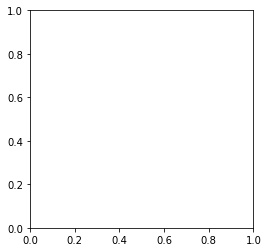

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (4, 4))
sizes = [count for count in tweet_df['polarity'].value_counts()]
labels = list(tweet_df['Sentimen'].value_counts().index)
explode = (0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
plt.show()
plt.savefig("gambar/klasifikasi_nbc.png")